In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow import keras
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model

In [0]:
#kyle = np.load('drive/My Drive/kyles.npy')
tyler = np.load('drive/My Drive/tyler.npy')
cage = np.load('drive/My Drive/cages.npy')

In [0]:
## encoder
e1 = keras.layers.Conv2D(16,(3,3),activation='relu', padding='same', input_shape=(175,175,3))
#e1.trainable=False

e2 = keras.layers.MaxPooling2D((2,2), padding='same')
#e2.trainable=False

e3 = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')
#e3.trainable=False

e4 = keras.layers.MaxPooling2D((2,2), padding='same')
#e4.trainable=False

e5 = keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')
#e5.trainable=False

## latent face
core = keras.layers.MaxPooling2D((2,2), padding='same')
#core.trainable=False

e6 = keras.layers.Flatten()
e7 = keras.layers.Dense(100)

##decoder
d1 = keras.layers.Conv2D(64,(3,3),activation='relu', padding='same', input_shape=(22, 22, 64))
d2 = keras.layers.UpSampling2D((2,2))
d3 = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')
d4 = keras.layers.UpSampling2D((2,2))
d5 = keras.layers.Conv2D(32,(3,3), activation='relu', padding='same')
d6 = keras.layers.UpSampling2D((2,2))

out = keras.layers.Conv2D(3,(2,2), activation='sigmoid', padding='valid')


## add layers to sequential model
# model = keras.Sequential()
# model.add(e1)
# model.add(e2)
# model.add(e3)
# model.add(e4)
# model.add(e5)
# model.add(core)


# model.add(d1)
# model.add(d2)
# model.add(d3)
# model.add(d4)
# model.add(d5)
# model.add(d6)
# model.add(out)

def encoder():
  model = keras.Sequential()
  model.add(e1)
  model.add(e2)
  model.add(Dropout(0.2))
  model.add(e3)
  model.add(e4)
  model.add(Dropout(0.2))
  model.add(e5)
  model.add(core)
  model.add(e6)
  model.add(e7)
  return model

def decoder():
  model = keras.Sequential()
  model.add(Dense(30976, input_shape=(100,)))
  model.add(Reshape((22,22,64)))
  model.add(d1)
  model.add(d2)
  model.add(Dropout(0.2))
  model.add(d3)
  model.add(d4)
  
  model.add(Dropout(0.2))
  model.add(d5)
  model.add(d6)
  model.add(out)
  return model

at the end of the encoder: model.add(flatten()), model.add(Dense(200))
and then add model.reshape((22,22,64)) at the beginning of the decoder

In [0]:
encoder = encoder()
decoder = decoder()

model = keras.Sequential()
model.add(encoder)
model.add(decoder)

In [26]:
encoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 175, 175, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 88, 88, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 88, 88, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 88, 88, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 44, 44, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 44, 44, 64)       

In [27]:
decoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30976)             3128576   
_________________________________________________________________
reshape_2 (Reshape)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 44, 44, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 44, 44, 32)        18464     
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 88, 88, 32)       

In [28]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 100)               3121284   
_________________________________________________________________
sequential_7 (Sequential)    (None, 175, 175, 3)       3193603   
Total params: 6,314,887
Trainable params: 6,314,887
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mse')

In [32]:
model.fit(tyler,tyler,epochs=100,batch_size=100)


Epoch 1/100
1789/1789 [==============================] - 8s 4ms/sample - loss: 0.0108
Epoch 2/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0096
Epoch 3/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0087
Epoch 4/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0078
Epoch 5/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0072
Epoch 6/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0067
Epoch 7/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0061
Epoch 8/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0056
Epoch 9/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0052
Epoch 10/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0048
Epoch 11/100
1789/1789 [==============================] - 7s 4ms/sample - loss: 0.0044
Epoch 12/100
1789/1789 [============================

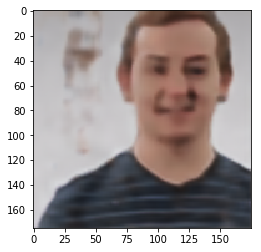

In [33]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(model.predict(np.array([tyler[850]]))[0],cv2.COLOR_BGR2RGB))
plt.show()
##try w tyler

In [0]:
encoder.save_weights('drive/My Drive/tyler_encoder5.h5')

In [0]:
decoder.save_weights('drive/My Drive/tyler_decoder5.h5')

In [0]:
encoder.load_weights('drive/My Drive/tyler_encoder5.h5')

In [0]:
decoder.load_weights('drive/My Drive/tyler_decoder5.h5')

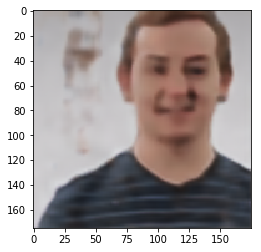

In [38]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([tyler[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
cage_encoded = encoder.predict(cage)

In [40]:
decoder.compile(optimizer='adam', loss='mse')
decoder.fit(cage_encoded, cage, epochs=100, batch_size=100)

Epoch 1/100
1516/1516 [==============================] - 5s 3ms/sample - loss: 0.0209
Epoch 2/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0097
Epoch 3/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0074
Epoch 4/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0062
Epoch 5/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0054
Epoch 6/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0048
Epoch 7/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0044
Epoch 8/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0041
Epoch 9/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0039
Epoch 10/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0037
Epoch 11/100
1516/1516 [==============================] - 4s 3ms/sample - loss: 0.0035
Epoch 12/100
1516/1516 [============================

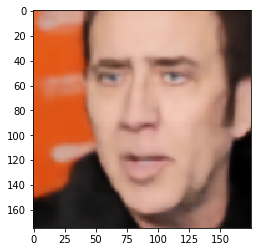

In [41]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([cage[100]])))[0],cv2.COLOR_BGR2RGB))
plt.show()


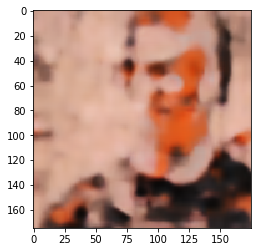

In [42]:
plt.imshow(cv2.cvtColor(decoder.predict(encoder.predict(np.array([tyler[850]])))[0],cv2.COLOR_BGR2RGB))
plt.show()
